In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [15]:
im = np.load('E:/polar/code/data/ir/entire/original_size/prepared/im256.npy')
ma = np.load('E:/polar/code/data/ir/entire/original_size/prepared/ma256.npy')
xtrain = np.load('E:/polar/code/data/ir/entire/original_size/prepared/imtrain256.npy')
ytrain = np.load('E:/polar/code/data/ir/entire/original_size/prepared/matrain256.npy')

In [24]:
print(xtrain.shape)
print(im.shape)

(25, 256, 256, 1)
(32, 256, 256, 1)


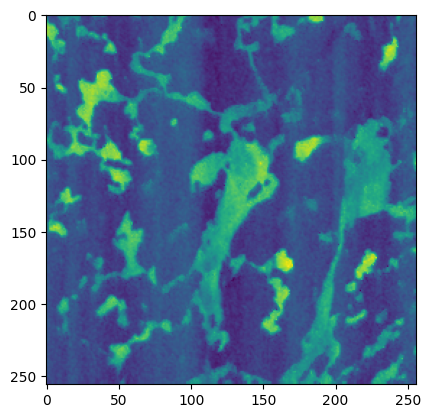

In [22]:
plt.imshow(xtrain[3,:,:,0])

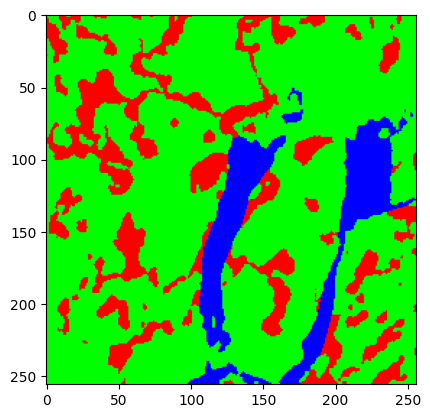

In [21]:
plt.imshow(ytrain[3])